In [1]:
!pip install python-whois
!pip install tldextract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-whois: filename=python_whois-0.8.0-py3-none-any.whl size=103262 sha256=092428b1b7de6189ed19a220faf8a6b469afc1b16c80679cf4f1040b211e71bf
  Stored in directory: /root/.cache/pip/wheels/e6/e9/d3/1e41a6c95b398de12c5a332ff28805aa44e68aa317ea60266d
Successfully built python-whois
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 2.2 MB/s eta 0:00:00


In [ ]:
# Load the required packages

import pandas as pd
import numpy as np
import sys
import re

from urllib.parse import urlparse,urlencode
# from bs4 import BeautifulSoup
from datetime import datetime
import ipaddress
import whois
import urllib
import urllib.request
import tldextract

import pickle


class FeatureExtract:

# This class contains the methods that extract the required features
# Across the entire dataset, 0 indicates legitimate url and 1 indicates phishing url
# Legitimate - 0; Phishing - 1


    def __init__(self):
        pass

    
    # def rank(self,url):

    #     # Method to check rank of the URL by connecting to the alexa rank API
    #     # Returns 0 if the rank is less than 100000 for the given URL else returns 1
        
    #     try:
            
    #         #Filling the whitespaces in the URL if any
            
    #         url = urllib.parse.quote(url)
    #         rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&url=" + url).read(), "xml").find(
    #             "REACH")['RANK']
    #         print('Hello')
    #         rank = int(rank)
    #     except TypeError:
    #         return 1
    #     if rank <100000:
    #         return 0
    #     else:
    #         return 1
        

    def isIP(self,url):
        
        # Method to check if an IP is found in the URL
        # Returns 1 if IP is found in the given URL else returns 0
        
        try:
            ipaddress.ip_address(url)
            ip = 1
        except:
            ip = 0
        return ip
    

    def isValid(self,domain_name):
        
        # Method to check the validity of the URL domain
        # Returns 1 if age of the domain is less than 6 else returns 0
        
        creation_date = domain_name.creation_date
        expiration_date = domain_name.expiration_date
        if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
            try:
                creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
                expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
            except:
                  return 1
        if ((expiration_date is None) or (creation_date is None)):
            return 1
        elif ((type(expiration_date) is list) or (type(creation_date) is list)):
            return 1
        else:
            ageofdomain = abs((expiration_date - creation_date).days)
            if ((ageofdomain/30) < 6):
                age = 1
            else:
                age = 0
        return age


    def domain_reg_len(self,domain_name):
        
        # Method to check the expiration of the URL domain
        # Returns 1 if the domain has expired else returns 0
        print('hello')
        expiration_date = domain_name.expiration_date
        if isinstance(expiration_date,str):
            try:
                expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
            except:
                return 1
        if (expiration_date is None):
            return 1
        elif (type(expiration_date) is list):
            return 1
        else:
            today = datetime.now()
            end = abs((expiration_date - today).days)
            if ((end/30) < 6):
                end = 0
            else:
                end = 1
        return end


    def isat(self,url):
        
        # Method to check for '@' in the URL
        # Returns 1 if found else returns 0
        
        if "@" in url:
            return 1    
        else:
            return 0    


    def isRedirect(self,url):
        
        # Method to check for '//' in the URL
        # Returns 1 if found within length of 7 for the given URL or if 'http' is found else returns 0
        
        pos = url.rfind('//')
        if pos > 6:
            if pos > 7:
                return 1
            else:
                return 0
        else:
            return 0


    def haveDash(self,url):
        
        # Method to check for '-' in the URL
        # Returns 1 if found else returns 0
        
        if '-' in urlparse(url).netloc:
            return 1            
        else:
            return 0   
    

    def no_sub_domain(self,url):
        
        # Method to check number of subdomains in the URL
        # Returns 0 if number of subdomains is 1 else returns 1

        url = str(url)
        url = url.replace("www.","")
        url = url.replace("."+tldextract.extract(url).suffix,"")
        count = url.count(".")
        if count==1:
            return 0
        else:
            return 1



    def httpDomain(self,url):
        
        # Method to check for 'https' in the URL
        # Returns 1 if found else returns 0

        domain = urlparse(url).netloc
        if 'http' in domain:
            return 1
        else:
            return 0


    def LongURL(self,url):
        
        # Method to checks the length of the URL
        # Returns 0 if the length is less than 54 else returns 1

        if len(url) < 54:
            return 0           
        else:
            return 1            


    def tinyURL(self,url):
        
        # Method to check if the URL belong to shortening services
        # Returns 1 if found else returns 0
        
        #listing shortening services
    
        shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"
        match=re.search(shortening_services,url)
        if match:
            return 1
        else:
            return 0





class PredictURL(FeatureExtract):
    
    # This class inherits FeatureExtract class to access all its methods
    # The main classification of the URL is done via the methods of this class
    
    def __init__(self):
        pass
        
    
    def predict(self,url):

        print("hi")
        
        # Method to call all the methods in the FeatureExtract class to 
        #get the features of the given URL and appends it to an np array
        # Returns the result of classification by calling the classify function
        
        feature = []
        dns = 0
        
        # URL is passed to whois API to fetch the domain name 
        try:
            print("hi")
            domain_name = whois.whois(urlparse(url).netloc)
            print("hi2")

        except:
            dns = 1
       
        #Domain based features (3)
        
        feature.append(self.rank(url))
        # feature.append(1 if dns == 1 else self.isValid(domain_name))
        # feature.append(1 if dns == 1 else self.domain_reg_len(domain_name))

        #Address bar based features (5)
        feature.append(self.isIP(url))
        
        feature.append(self.isat(url))
  

        feature.append(self.isRedirect(url))
        feature.append(self.haveDash(url))
        feature.append(self.no_sub_domain(url))
        feature.append(self.LongURL(url))
        feature.append(self.tinyURL(url))
        
        return self.classify(np.array(feature).reshape((1,-1)))
        
    
    def __getstate__(self):

        # this method is called when you are
        # going to pickle the class, to know what to pickle
        
        state = self.__dict__.copy()
        
        # don't pickle the parameter fun. otherwise will raise 
        # AttributeError: Can't pickle local object 'Process.__init__.<locals>.<lambda>'
        
        return state
    
    
    def __setstate__(self, state):
        
        self.__dict__.update(state)

        
    def classify(self,features):
        
        #Method to classify the URL, given its features.
        #It loads the saved mode in the pickle file to perform the classification
        
        # Load the pickle file
        
        pick_file = open('phishing_classifier.pkl', 'rb') 
        Pickled_sample_Model = pickle.load(pick_file)
        pick_file.close()
    
        # Classify the URL features using the loaded pickle file
        
        result = Pickled_sample_Model.predict(features)
        if result == 0:
            return "Given website is a legitimate site"
        else:
            return "Given website is a phishing site"
    
# Main function

def main():

    pass

if __name__ == "__main__":
    main()


In [ ]:
# Load the required packages
!pip install whois
!pip install tldextract
import pandas as pd
import numpy as np 
import re


from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
# from sklearn.metrics import plot_precision_recall_curve

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# import the feature_extract file to perform feature extraction process
# %run /content/drive/MyDrive/Miniproj/feature_extraction.py
# from feature_extraction import FeatureExtract, PredictURL

import pickle

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import timeit
from math import sqrt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the phishing dataset

In [ ]:
#Load the dataset into dataframe

phishing_raw_df = pd.read_csv("/content/drive/MyDrive/Miniproj/Main_dataset.csv", header = 0)

In [ ]:
# Dropping null values, duplicates and reset the index

phishing_raw_df = phishing_raw_df.dropna()
phishing_raw_df = phishing_raw_df.drop_duplicates()
phishing_raw_df = phishing_raw_df.reset_index(drop=True)
phishing_raw_df.shape

(72363, 12)

In [ ]:
print(phishing_raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   domain          95910 non-null  object
 1   ranking         95910 non-null  int64 
 2   isIp            95910 non-null  int64 
 3   valid           95910 non-null  int64 
 4   activeDuration  95910 non-null  int64 
 5   urlLen          95910 non-null  int64 
 6   is@             95910 non-null  int64 
 7   isredirect      95910 non-null  int64 
 8   haveDash        95910 non-null  int64 
 9   domainLen       95910 non-null  int64 
 10  nosOfSubdomain  95910 non-null  int64 
 11  label           95910 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 8.8+ MB
None


## Data Pre-processing

Class Legitimate URL: 39996
Class Phishing URL: 55914
Proportion: 0.72 : 1


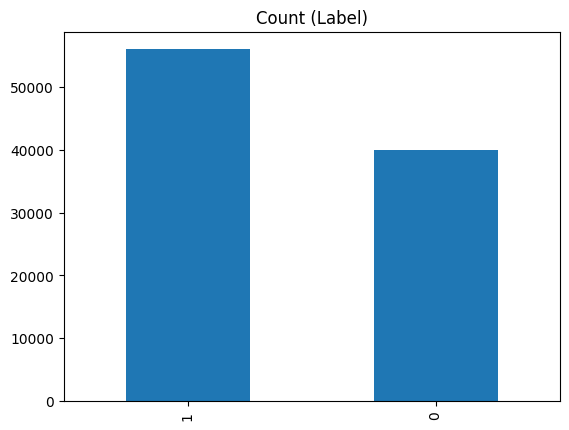

In [ ]:
# Plotting a bar graph with the number of Legitimate and Phishing class urls

target_count = phishing_raw_df.label.value_counts()
print('Class Legitimate URL:', target_count[0])
print('Class Phishing URL:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

phishing_raw_df.label.value_counts().plot(kind='bar', title='Count (Label)');

Random under-sampling:
1    39996
0    39996
Name: label, dtype: int64


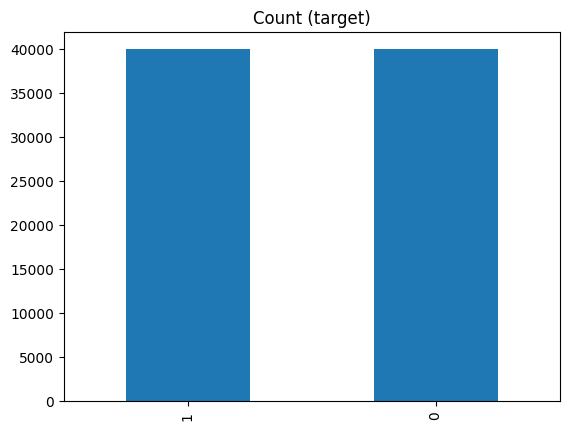

In [ ]:
# Each Class count

count_class_1, count_class_0 = phishing_raw_df.label.value_counts()

# Divide by each class

df_class_0 = phishing_raw_df[phishing_raw_df['label'] == 0]
df_class_1 = phishing_raw_df[phishing_raw_df['label'] == 1]

# As the class 1 values are more than to class 0,
# Undersampling is performed to avoid bias and have same number of urls in both classes

df_class_1_under = df_class_1.sample(count_class_0)
phishing_raw_df = pd.concat([df_class_1_under, df_class_0], axis=0)

print('Random under-sampling:')
print(phishing_raw_df.label.value_counts())

phishing_raw_df.label.value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
# Viewing sample data from dataframe

phishing_raw_df.head()

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
18728,ok.qqus.asia/m=weblogin/index.htm,10000000,0,0,0,33,0,0,0,12,2,1
47052,bernweds.info/GRcntrlde/_webscr.php?nxEXEC=d2V...,10000000,0,0,0,137,0,0,0,13,1,1
21957,mail.zrsthemovie.com/code/nbhyavwc/bhbaa/384d8...,10000000,0,1,4018,179,0,0,0,20,2,1
15157,paypal.com.update-account-information-webscrcm...,10000000,0,0,0,157,0,0,1,123,6,1
89661,mygreenstone.ca/security/,10000000,0,0,0,25,0,0,0,15,1,1


## Data Transformation

In [ ]:
# Object created for the features class imported from feature_extract file
# This class has the methods that extracts features given the URL

feature = FeatureExtract()

In [ ]:
# Insert a new column to the dataframe which shows if 'http' is found in the domain part of the URL.

phishing_raw_df["Domain_http"] = phishing_raw_df["domain"].apply( lambda x: feature.httpDomain(x))

# # Insert a new column to the dataframe indicating the length of the URL.

phishing_raw_df["LongURL"] = phishing_raw_df["domain"].apply( lambda x: feature.LongURL(x))

# # Insert a new column to the dataframe indicating if the URL belongs to any of the shortening services.

phishing_raw_df["TinyURL"] = phishing_raw_df["domain"].apply( lambda x: feature.tinyURL(x))

# # Alter the values in 'nosOfSubdomain' column of the dataframe.
# # If the number of sub domains is more than 1, then it is a phishing site.

phishing_raw_df["nosOfSubdomain"] = phishing_raw_df["domain"].apply( lambda x: feature.no_sub_domain(x))

# # Alter the values in 'activeDuration' column of the dataframe.
# # If the value is greater than 365 (1 year), then it is a legitimate site.

phishing_raw_df["activeDuration"] = phishing_raw_df["activeDuration"].apply( lambda x: 1 if x <= 365 else 0)

# # Alter the values in the dataframe column 'ranking'
# # If the value is greater than 100000, then it is a phishing site

phishing_raw_df["ranking"] = phishing_raw_df["ranking"].apply( lambda x: 0 if x < 100000 else 1)

# Remove the unwanted columns from the dataframe

phishing_raw_df.drop(['urlLen','domainLen','domain'], inplace=True,axis=1)

# Reorder and rename the columns in the dataframe

Columns = ['Rank','isIP','isValid','Domain_reg_len','is@','isRedirect','haveDash','SubDomain','Label','Domain_http','LongURL','TinyURL']
new_columns = ['Rank','isIP','isValid','Domain_reg_len','is@','isRedirect','haveDash','SubDomain','Domain_http','LongURL','TinyURL','Label']
phishing_raw_df.columns = Columns
phishing_raw_df = phishing_raw_df.reindex(columns=new_columns)
phishing_raw_df1 = phishing_raw_df.copy(deep=True)
phishing_raw_df1.drop(['Domain_http'],inplace=True,axis=1)
phishing_raw_df1.drop(['isValid'],inplace=True,axis=1)
phishing_raw_df1.drop(['Domain_reg_len'],inplace=True,axis=1)
phishing_raw_df1.drop(['Rank'],inplace=True,axis=1)


# Shuffle the rows in the dataset so that when splitting the train and test set are equally distributed

phishing_raw_df_x = phishing_raw_df1.sample(frac=1).reset_index(drop=True)

# Save the dataframe to a csv file 

phishing_raw_df_x.to_csv('phishing_feature_engg.csv', encoding='utf-8')

#Display the dataset after data pre-processing

phishing_raw_df_x.head()

,isIP,is@,isRedirect,haveDash,SubDomain,LongURL,TinyURL,Label
0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1
2,0,0,0,0,1,0,0,1
3,0,0,0,0,1,1,0,1
4,0,0,0,0,1,1,0,0


In [ ]:
# Check for null values

phishing_raw_df_x.isnull().sum()

isIP          0
is@           0
isRedirect    0
haveDash      0
SubDomain     0
LongURL       0
TinyURL       0
Label         0
dtype: int64

## Data Statistics

In [ ]:
phishing_raw_df_x.describe()

,isIP,is@,isRedirect,haveDash,SubDomain,LongURL,TinyURL,Label
count,79992.000000,79992.000000,79992.000000,79992.000000,79992.000000,79992.000000,79992.000000,79992.000000
mean,0.000225,0.002413,0.006301,0.143289,0.549192,0.353298,0.069932,0.500000
std,0.014999,0.049061,0.079127,0.350370,0.497577,0.477997,0.255034,0.500003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.500000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

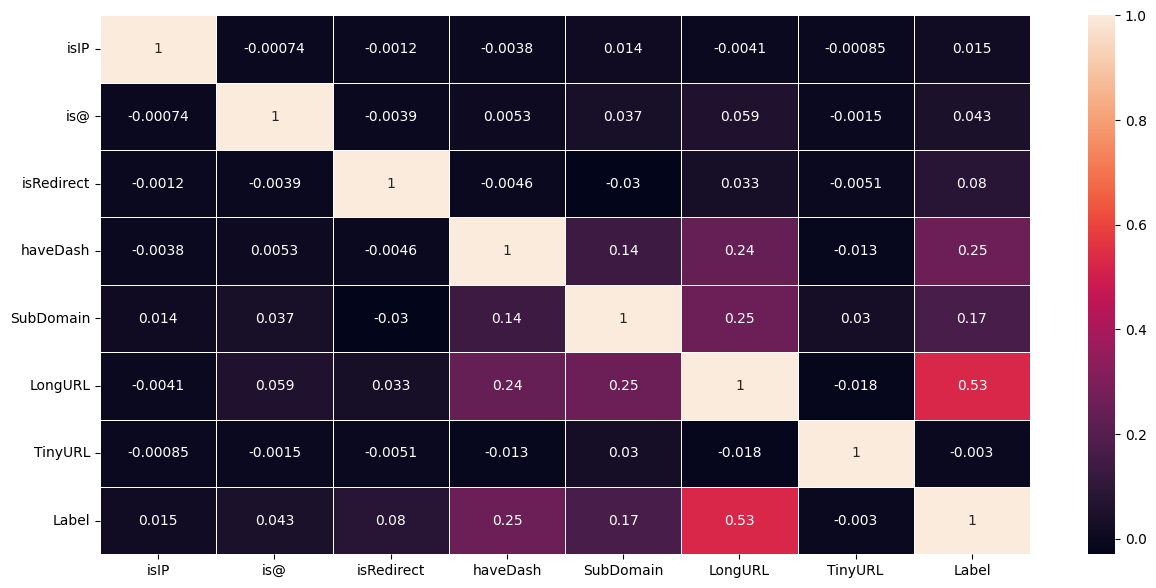

In [ ]:
# Heat Map

plt.figure(figsize=(15,7))
sns.heatmap(phishing_raw_df1.corr(),annot=True, linewidth=0.5)

In [ ]:
# Label column was dropped and stored the feature data in X
X=phishing_raw_df_x.drop(["Label"],axis=1)

# store the labels in y
Y=phishing_raw_df_x["Label"]

#split the data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=101)

In [ ]:
# Fit the data with decision tree classifier to identify feature importance

dtc = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 5)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=100)

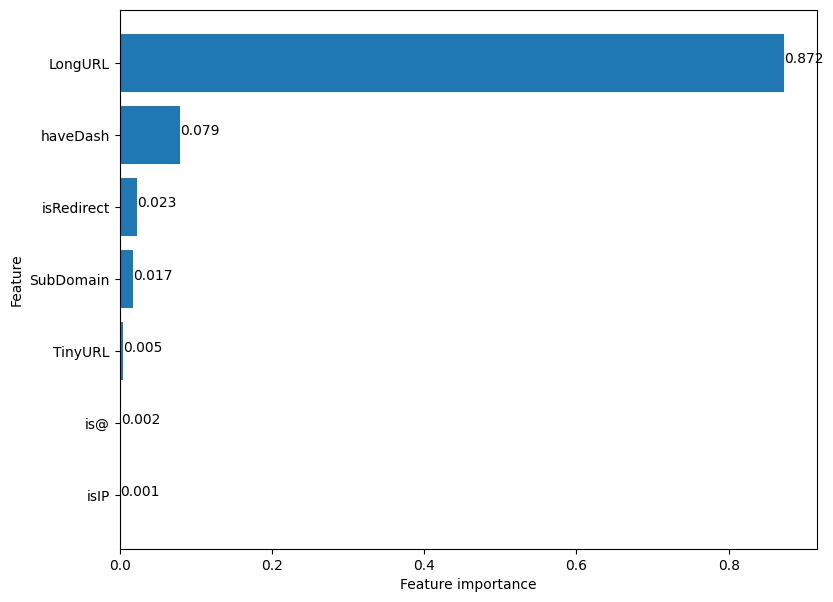

In [ ]:
# Get the feature importance for all the features, from the decision tree classifier

importances = dtc.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), importances[indices], align='center')
plt.yticks(np.arange(n_features), X_train.columns[indices])
for index, value in enumerate(importances[indices]):
    plt.text(value, index, str(round(value,3)))
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
# Drop the features with least importance and assign the input and output
# variables from the dataset

# phishing_raw_df_x.drop(["isIP","Domain_http","is@"],inplace=True,axis=1)

phishing_raw_df_x.head()


# X = phishing_raw_df_x.iloc[:, :8]
# Y = phishing_raw_df_x["Label"]

,isIP,is@,isRedirect,haveDash,SubDomain,LongURL,TinyURL,Label
0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1
2,0,0,0,0,1,0,0,1
3,0,0,0,0,1,1,0,1
4,0,0,0,0,1,1,0,0


In [ ]:
# Split the data for training and testing 

X_train, X_test, y_train, y_test = train_test_split(X.values,Y.values, test_size=0.3, random_state=101)

## Model Development

### XGBoost

In [ ]:
def XG_Boost_classifier():
    
    # Funtion for XGBoost model
    
    global XGB_model
    
    XGB_model = XGBClassifier(random_state=100)
    
    train_start = timeit.default_timer()
    XGB_model.fit(X_train, y_train)
    train_time = timeit.default_timer() - train_start
    
    test_start = timeit.default_timer()
    pred_XGB_test = XGB_model.predict(X_test)
    test_time = timeit.default_timer() - test_start
    
    pred_XGB_train = XGB_model.predict(X_train)
    kappa_XGB = cohen_kappa_score(y_test, pred_XGB_test)
    
    # Print the classification report

    print('\n---------- XGBoost ----------\n')
    print('Classification Report:\n', classification_report(y_test, pred_XGB_test, target_names=['0','1']))
    
    # Print the Confusion matrix
    
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred_XGB_test),display_labels=['0','1'])
    print('\nConfusion matrix:\n',disp.plot())
    
    # Print the precision-recall graph
    
    # plot_precision_recall_curve(XGB_model, X_test, y_test, name = 'XGBoost')
    
    return (('XGBoost',accuracy_score(y_train,pred_XGB_train),accuracy_score(y_test,pred_XGB_test),kappa_XGB, train_time,test_time))


## Decision Tree

In [ ]:
def Decision_Tree_classifier():
    
    # Funtion for Decision Tree model
    
    global DTC_model
    
    DTC_model = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 5)
    
    train_start = timeit.default_timer()
    DTC_model.fit(X_train,y_train)
    train_time = timeit.default_timer() - train_start
    
    test_start = timeit.default_timer()
    pred_dtc_test = DTC_model.predict(X_test)
    test_time = timeit.default_timer() - test_start
    
    pred_dtc_train = DTC_model.predict(X_train)
    kappa_dtc = cohen_kappa_score(y_test, pred_dtc_test)
    
    # Print the classification report
    
    print('\n---------- Decision Tree ----------\n')
    print('Classification Report :\n', classification_report(y_test, pred_dtc_test, target_names=['0','1']))
    
    # Print the Confusion matrix
    
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred_dtc_test),display_labels=['0','1'])
    print('\nConfusion matrix:\n',disp.plot())
    
    # Print the precision-recall graph
    
    # plot_precision_recall_curve(DTC_model, X_test, y_test, name = 'Decision Tree')
    
    return (('Decision Tree',accuracy_score(y_train,pred_dtc_train),accuracy_score(y_test,pred_dtc_test), kappa_dtc, train_time,test_time))

## Neural Network

In [ ]:
def Neural_Network_classifier():
    
    # Funtion for Neural Network model
    # The neural network is trained with 3 layers 
    global MLP_model

    MLP_model = MLPClassifier(hidden_layer_sizes=(12,12,12), activation='relu', solver='adam', max_iter=500)
    
    train_start = timeit.default_timer()  
    MLP_model.fit(X_train,y_train)
    train_time = timeit.default_timer() - train_start
    
    test_start = timeit.default_timer()
    pred_NN_test = MLP_model.predict(X_test)
    test_time = timeit.default_timer() - test_start
    
    pred_NN_train = MLP_model.predict(X_train)
    kappa_NN = cohen_kappa_score(y_test, pred_NN_test)
    
    # Print the classification report
    
    print('\n---------- Neural Network ----------\n')
    print('Classification Report:\n', classification_report(y_test, pred_NN_test, target_names=['0','1']))
    
    # Print the Confusion matrix
    
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred_NN_test),display_labels=['0','1'])
    print('\nconfusion matrix:\n',disp.plot())
    
    # Print the precision-recall graph
    
    # plot_precision_recall_curve(MLP_model, X_test, y_test, name = 'Neural Network')
    
    return (('Neural Network',accuracy_score(y_train,pred_NN_train),accuracy_score(y_test,pred_NN_test), kappa_NN, train_time,test_time))

# SVM

In [ ]:
def Svm_classifier():
    
    # Funtion for SVM model
    
    global SVM_model
    
    SVM_model = SVC(kernel='poly', degree=9, random_state=12)
    
    train_start = timeit.default_timer()
    SVM_model.fit(X_train, y_train)
    train_time = timeit.default_timer() - train_start
    
    test_start = timeit.default_timer()
    pred_svm_test = SVM_model.predict(X_test)
    test_time = timeit.default_timer() - test_start
    
    pred_svm_train = SVM_model.predict(X_train)
    kappa_svm = cohen_kappa_score(y_test, pred_svm_test)
    
    # Print the classification report
    
    print('\n---------- SVM ----------\n')
    print('Classification Report:\n', classification_report(y_test, pred_svm_test, target_names=['0','1']))
    
    # Print the Confusion matrix
    
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred_svm_test),display_labels=['0','1'])
    print('\nconfusion matrix:\n',disp.plot())
    
    # Print the precision-recall graph
    
    # plot_precision_recall_curve(SVM_model, X_test, y_test, name = 'SVM')
    
    return (('SVM',accuracy_score(y_train,pred_svm_train),accuracy_score(y_test,pred_svm_test), kappa_svm, train_time,test_time))

# Naive Bayes

In [ ]:
def Naive_Bayes_classifier():
    
    # Funtion for Naive Bayes model
    
    global NBC_model
    
    NBC_model = BernoulliNB()
    
    train_start = timeit.default_timer()
    NBC_model.fit(X_train,y_train)
    train_time = timeit.default_timer() - train_start
    
    test_start = timeit.default_timer()
    pred_nb_test = NBC_model.predict(X_test)
    test_time = timeit.default_timer() - test_start
    
    pred_nb_train = NBC_model.predict(X_train)
    kappa_nb = cohen_kappa_score(y_test, pred_nb_test)
    
    # Print the classification report
    
    print('\n---------- Naive Bayes ----------\n')
    print('Classification Report:\n', classification_report(y_test, pred_nb_test, target_names=['0','1']))
    
    # Print the Confusion matrix
    
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred_nb_test),display_labels=['0','1'])
    print('\nconfusion matrix:\n',disp.plot())
    
    # Print the precision-recall graph
    
    # plot_precision_recall_curve(NBC_model, X_test, y_test, name = 'Naive Bayes')
    
    return (('Naive Bayes',accuracy_score(y_train,pred_nb_train),accuracy_score(y_test,pred_nb_test),kappa_nb, train_time,test_time))

# Logistic Regression

In [ ]:
def Logistic_Regression_classifier():
    
    # Funtion for Logistic Regression model
    
    global LOG_model

    LOG_model = LogisticRegression(random_state=100)
    
    train_start = timeit.default_timer()
    LOG_model.fit(X_train,y_train)
    train_time = timeit.default_timer() - train_start
    
    test_start = timeit.default_timer()
    pred_logreg_test = LOG_model.predict(X_test)
    test_time = timeit.default_timer() - test_start
   
    pred_logreg_train = LOG_model.predict(X_train)
    kappa_lg =  cohen_kappa_score(y_test, pred_logreg_test)
    
    # Print the classification report
    
    print('\n---------- Logistic Regression ----------\n')
    print('Classification Report:\n', classification_report(y_test, pred_logreg_test, target_names=['0','1']))
    
    # Print the Confusion matrix
    
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred_logreg_test),display_labels=['0','1'])
    print('\nconfusion matrix:\n',disp.plot())
    
    # Print the precision-recall graph
    
    # plot_precision_recall_curve(LOG_model, X_test, y_test, name = 'Logistic Regression')
    
    return (('Logistic Regression',accuracy_score(y_train,pred_logreg_train),accuracy_score(y_test,pred_logreg_test),kappa_lg, train_time,test_time))

# RandomForest

In [ ]:
def Random_Forest_classifier():
    
    # Funtion for Random Forest model
    
    global RFC_model
    
    RFC_model = RandomForestClassifier(criterion='entropy',random_state=100)
    
    train_start = timeit.default_timer()
    RFC_model.fit(X_train, y_train)
    train_time = timeit.default_timer() - train_start
    
    test_start = timeit.default_timer()
    pred_RF_test = RFC_model.predict(X_test)
    test_time = timeit.default_timer() - test_start
    
    pred_RF_train = RFC_model.predict(X_train)
    kappa_rf = cohen_kappa_score(y_test, pred_RF_test)
    
    # Print the classification report
    
    print('\n---------- Random Forest ----------\n')
    print('Classification Report:\n', classification_report(y_test, pred_RF_test, target_names=['0','1']))
    
    # Print the Confusion matrix
    
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred_RF_test),display_labels=['0','1'])
    print('\nconfusion matrix:\n',disp.plot())
    
    # Print the precision-recall graph
    
    # plot_precision_recall_curve(RFC_model, X_test, y_test, name = 'Random Forest')
    
    return (('Random Forest',accuracy_score(y_train,pred_RF_train),accuracy_score(y_test,pred_RF_test),kappa_rf, train_time, test_time))

## Evaluation Metrics

In [ ]:

def Roc_curves():
    
    # Function to display the ROC curves for the models
    plt.figure()
    
    # Add the models to the list that you want to view on the ROC plot
    models = [
    {
        'label': 'Logistic Regression',
        'model': LogisticRegression(random_state=100),
    },
    {
        'label': 'SVM',
        'model': SVC(kernel='linear', C=1.0, random_state=100,probability=True),
    },
    {
        'label': 'NaiveBayes',
        'model': BernoulliNB(),
    },
    {
        'label': 'Decision Tree',
        'model': DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 5),
    },
    {
        'label': 'RandomForest',
        'model': RandomForestClassifier(criterion='entropy',random_state=100)
    },
    {
        'label': 'XGBoost',
        'model': XGBClassifier(random_state=100),
    },
    {
        'label': 'Neural Network',
        'model': MLPClassifier(hidden_layer_sizes=(12,12,12), activation='relu', solver='adam', max_iter=500)
    }
    ]

    # Below for loop iterates through your models list
    
    for m in models: 
        model = m['model']                # select the model
        model.fit(X_train, y_train)       # train the model
        y_pred=model.predict(X_test)      # predict the test data
    
    # Compute False postive rate, and True positive rate
    
        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    
    # Calculate Area under the curve to display on the plot
    
        auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    # Now, plot the computed values
    
        plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
        
    # Custom settings for the plot 
    
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()   

In [ ]:
def call_ml_models():
    
    # Function to invoke all the proposed ML models and consolidates the performace of each model
    
    kappa_list = []
    ML_Model = []
    acc_train = []
    acc_test = []
    train_time = []
    test_time = []
    model_list = [Logistic_Regression_classifier,Naive_Bayes_classifier,Svm_classifier,Decision_Tree_classifier,Random_Forest_classifier,XG_Boost_classifier,Neural_Network_classifier]
    
    # Below loop iterates to invoke each models in the model_list
    
    for model in model_list: 
        res = model()
        ML_Model.append(res[0])
        acc_train.append(res[1])
        acc_test.append(res[2])
        kappa_list.append(res[3]) 
        train_time.append(res[4])
        test_time.append(res[5])
        
    # Call to display the ROC curves of all the models
    
    Roc_curves()
        
    return ML_Model,acc_train,acc_test,kappa_list,train_time,test_time  




---------- Logistic Regression ----------

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.85      0.78     11846
           1       0.83      0.68      0.74     12152

    accuracy                           0.76     23998
   macro avg       0.77      0.76      0.76     23998
weighted avg       0.77      0.76      0.76     23998


confusion matrix:

---------- Naive Bayes ----------

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.85      0.78     11846
           1       0.83      0.68      0.74     12152

    accuracy                           0.76     23998
   macro avg       0.77      0.76      0.76     23998
weighted avg       0.77      0.76      0.76     23998


confusion matrix:

---------- SVM ----------

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.85      0.78     11846
           1       

KeyboardInterrupt: ignored

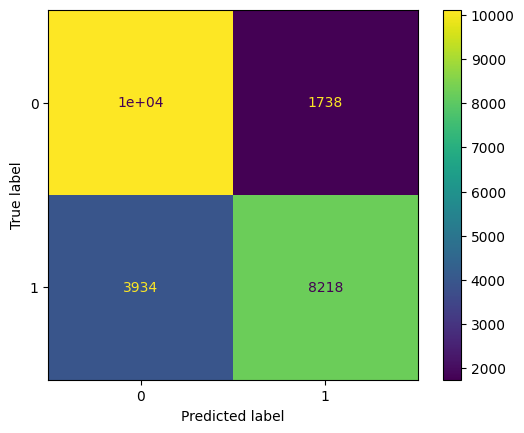

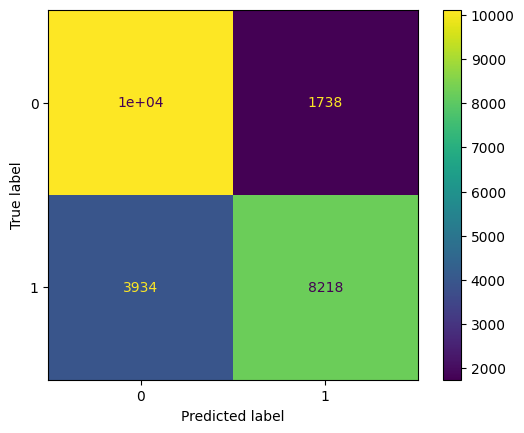

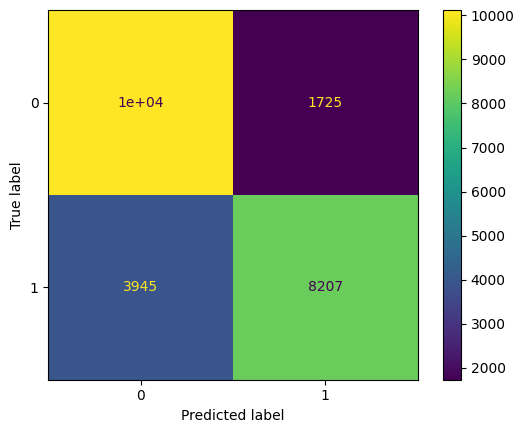

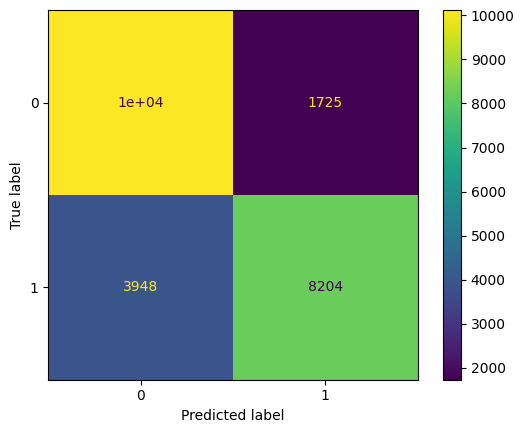

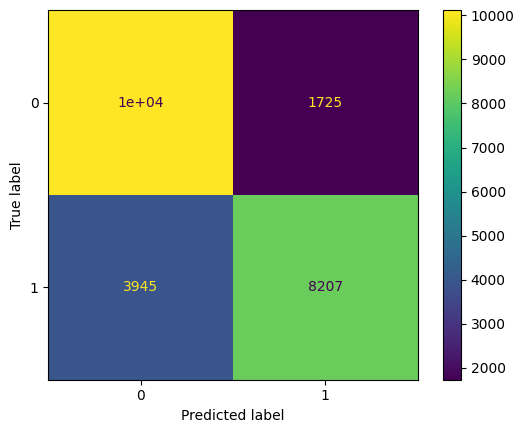

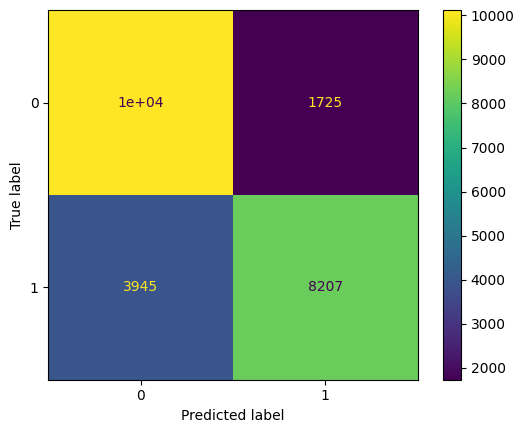

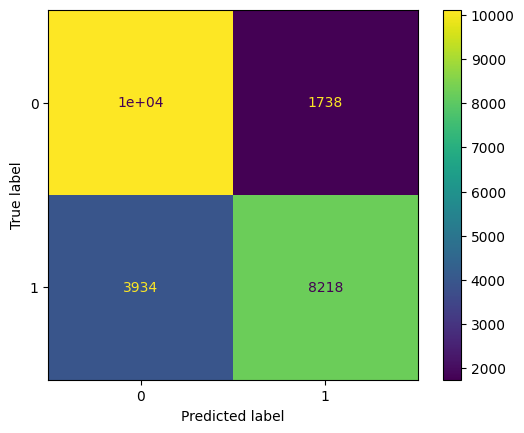

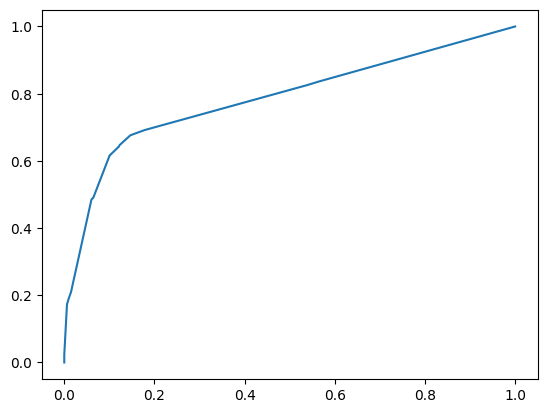

In [ ]:
# Invoke the call models function to display the model performance statistics

ML_Model,acc_train,acc_test,kappa_list,train_time,test_time = call_ml_models()

# Create the dataframe with the consolidated accuracies and timings of all models

results = pd.DataFrame({ 'ML Model': ML_Model, 
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test, 'Kappa Score': kappa_list,
    'Training Time': train_time, 'Testing Time': test_time})

results # Display results

## Hyper parameter tunning

In [ ]:
# Assign the XGBoost parameters to the parameter grid 

param_grid = [
  {
    'n_estimators': [200, 250],
    'max_depth': [5,6]
  }
]

scoring = {'AUC':'roc_auc', 'Accuracy':make_scorer(accuracy_score)}

In [ ]:
# Using Grid search to find the hyper parameters of XGBoost

XGB_grid = GridSearchCV(XGB_model,param_grid=param_grid,cv=5,scoring=scoring,refit='AUC',verbose=1,n_jobs=-1)
XGB_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=100, ...),
             n_jobs=-1,
             param_grid=[{'max_depth': [5, 6], 'n_estimators': [200, 250]}],
             refit='AUC',
             scoring={'AUC': 'roc_auc',
                      'Accuracy': make_scorer(accuracy_score)},
             verbose=1)

In [ ]:
# Check for accuracy changes using the fine tuned XGB Model parameters 
XGB_model_best = XGB_grid.best_estimator_


XGB_model_best.fit(X_train, y_train)
pred_RF_test = XGB_model_best.predict(X_test)
pred_RF_train = XGB_model_best.predict(X_train)

kappa_rf = cohen_kappa_score(y_test, pred_RF_test)
train_acc = accuracy_score(y_train,pred_RF_train)
test_acc = accuracy_score(y_test,pred_RF_test)

print('Kappa: ',kappa_rf)
print('Train accuracy: ',train_acc)
print('Test accuracy: ',test_acc)

Kappa:  0.5284963048466387
Train accuracy:  0.7610994035075187
Test accuracy:  0.7637303108592383


## Save the model

In [ ]:
def save_model(model):
    
    # Function to save the required model using pickle
    
    with open('phishing_classifier.pkl', 'wb') as f:
        pickle.dump(model, f, -1)
        f.close()


        
save_model(XGB_model_best)

## Perform the classification using the saved model

In [ ]:
# Load the required packages

import pandas as pd
import numpy as np
import sys
import re

from urllib.parse import urlparse,urlencode
from bs4 import BeautifulSoup
from datetime import datetime
import ipaddress
import whois
import urllib
import urllib.request
import tldextract

import pickle


class FeatureExtract:

# This class contains the methods that extract the required features
# Across the entire dataset, 0 indicates legitimate url and 1 indicates phishing url
# Legitimate - 0; Phishing - 1


    def __init__(self):
        pass

    
    # def rank(self,url):

    #     # Method to check rank of the URL by connecting to the alexa rank API
    #     # Returns 0 if the rank is less than 100000 for the given URL else returns 1
        
    #     try:
            
    #         #Filling the whitespaces in the URL if any
            
    #         url = urllib.parse.quote(url)
    #         rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&url=" + url).read(), "xml").find(
    #             "REACH")['RANK']
    #         print('Hello')
    #         rank = int(rank)
    #     except TypeError:
    #         return 1
    #     if rank <100000:
    #         return 0
    #     else:
    #         return 1
        

    def isIP(self,url):
        
        # Method to check if an IP is found in the URL
        # Returns 1 if IP is found in the given URL else returns 0
        
        try:
            ipaddress.ip_address(url)
            ip = 1
        except:
            ip = 0
        return ip
    

    def isValid(self,domain_name):
        
        # Method to check the validity of the URL domain
        # Returns 1 if age of the domain is less than 6 else returns 0
        
        creation_date = domain_name.creation_date
        expiration_date = domain_name.expiration_date
        if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
            try:
                creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
                expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
            except:
                  return 1
        if ((expiration_date is None) or (creation_date is None)):
            return 1
        elif ((type(expiration_date) is list) or (type(creation_date) is list)):
            return 1
        else:
            ageofdomain = abs((expiration_date - creation_date).days)
            if ((ageofdomain/30) < 6):
                age = 1
            else:
                age = 0
        return age


    def domain_reg_len(self,domain_name):
        
        # Method to check the expiration of the URL domain
        # Returns 1 if the domain has expired else returns 0
        print('hello')
        expiration_date = domain_name.expiration_date
        if isinstance(expiration_date,str):
            try:
                expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
            except:
                return 1
        if (expiration_date is None):
            return 1
        elif (type(expiration_date) is list):
            return 1
        else:
            today = datetime.now()
            end = abs((expiration_date - today).days)
            if ((end/30) < 6):
                end = 0
            else:
                end = 1
        return end


    def isat(self,url):
        
        # Method to check for '@' in the URL
        # Returns 1 if found else returns 0
        
        if "@" in url:
            return 1    
        else:
            return 0    


    def isRedirect(self,url):
        
        # Method to check for '//' in the URL
        # Returns 1 if found within length of 7 for the given URL or if 'http' is found else returns 0
        
        pos = url.rfind('//')
        if pos > 6:
            if pos > 7:
                return 1
            else:
                return 0
        else:
            return 0


    def haveDash(self,url):
        
        # Method to check for '-' in the URL
        # Returns 1 if found else returns 0
        
        if '-' in urlparse(url).netloc:
            return 1            
        else:
            return 0   
    

    def no_sub_domain(self,url):
        
        # Method to check number of subdomains in the URL
        # Returns 0 if number of subdomains is 1 else returns 1

        url = str(url)
        url = url.replace("www.","")
        url = url.replace("."+tldextract.extract(url).suffix,"")
        count = url.count(".")
        if count==1:
            return 0
        else:
            return 1



    def httpDomain(self,url):
        
        # Method to check for 'https' in the URL
        # Returns 1 if found else returns 0

        domain = urlparse(url).netloc
        if 'http' in domain:
            return 1
        else:
            return 0


    def LongURL(self,url):
        
        # Method to checks the length of the URL
        # Returns 0 if the length is less than 54 else returns 1

        if len(url) < 54:
            return 0           
        else:
            return 1            


    def tinyURL(self,url):
        
        # Method to check if the URL belong to shortening services
        # Returns 1 if found else returns 0
        
        #listing shortening services
    
        shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"
        match=re.search(shortening_services,url)
        if match:
            return 1
        else:
            return 0





class PredictURL(FeatureExtract):
    
    # This class inherits FeatureExtract class to access all its methods
    # The main classification of the URL is done via the methods of this class
    
    def __init__(self):
        pass
        
    
    def predict(self,url):

        print("hi")
        
        # Method to call all the methods in the FeatureExtract class to 
        #get the features of the given URL and appends it to an np array
        # Returns the result of classification by calling the classify function
        
        feature = []
        dns = 0
        
        # URL is passed to whois API to fetch the domain name 
        # try:
        #     print("hi")
        #     domain_name = whois.whois(urlparse(url).netloc)
        #     print("hi2")

        # except:
        #     dns = 1
       
        #Domain based features (3)
        
        # feature.append(self.rank(url))
        # feature.append(1 if dns == 1 else self.isValid(domain_name))
        # feature.append(1 if dns == 1 else self.domain_reg_len(domain_name))

        #Address bar based features (5)
        feature.append(self.isIP(url))
        
        feature.append(self.isat(url))

        feature.append(self.isRedirect(url))
        feature.append(self.haveDash(url))
        feature.append(self.no_sub_domain(url))
        feature.append(self.LongURL(url))
        feature.append(self.tinyURL(url))

        
        return self.classify(np.array(feature).reshape((1,-1)))
        
       
    
    def __getstate__(self):

        # this method is called when you are
        # going to pickle the class, to know what to pickle
        
        state = self.__dict__.copy()
        
        # don't pickle the parameter fun. otherwise will raise 
        # AttributeError: Can't pickle local object 'Process.__init__.<locals>.<lambda>'
        
        return state
    
    
    def __setstate__(self, state):
        
        self.__dict__.update(state)

        
    def classify(self,features):
        
        #Method to classify the URL, given its features.
        #It loads the saved mode in the pickle file to perform the classification
        
        # Load the pickle file
        
        pick_file = open('/content/phishing_classifier.pkl', 'rb') 
        Pickled_sample_Model = pickle.load(pick_file)
        pick_file.close()
    
        # Classify the URL features using the loaded pickle file
        
        result = Pickled_sample_Model.predict(features)
        if result == 0:
            return "Given website is a legitimate site"
        else:
            return "Given website is a phishing site"
    
# Main function

def main():

    pass

if __name__ == "__main__":
    main()


In [ ]:
classification = PredictURL()

In [ ]:
%%time
# classification.predict('https://www.google.com')
classification.predict('https://www.facebook.com')

# classification.predict('https://obcontest-1.github.io/osoter/index.html')
#
# classification.predict('https://client-bourso.servehttp.com/conformité/	')

hi
CPU times: user 25.2 ms, sys: 0 ns, total: 25.2 ms
Wall time: 25.4 ms


'Given website is a legitimate site'